# PCA-Eigenfaces

#  实现部分PCA内容，并展示Eigenface
 
1  补充实现PCA中cal函数，其返回是：X_pca降维后矩阵，average_i平均矩阵，diffTrain偏差矩阵（原矩阵-平均矩阵），topd_evecs特征向量矩阵(n*n_components)   

2  填空实现展示Eigenfaces代码

**提示 eigenvalue,featurevector =np.linalg.eig(X_cov) **   
**注意代码实现的位置**
  
 #-------------请在以下区域补充算法--------------
 #-------------请在以上区域补充算法--------------
** 

In [1]:
import numpy as np

In [2]:
class PCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components
        self.mean_ = None #平均矩阵
        self.diffTrain = None #偏差矩阵
        self.components_ = None #特征向量矩阵
        
    def fit(self, X):
        '''
        X:训练样本集x1,x2,...,xm
        '''
        X = np.array(X, dtype=float)
        X_pca = None
        X_pca, average_i, diffTrain, topd_evecs = self.cal(X)
        #average_i 均值矩阵，X_pca降维后矩阵，diffTrain 偏差矩阵
        self.mean_ = np.array(average_i, dtype=float)
        self.diffTrain = np.array(diffTrain, dtype=float)
        self.components_ = np.array(topd_evecs.T, dtype=float)
    
    def transform(self, X):
        '''
        X:训练样本集x1,x2,...,xm
        '''
        X = np.array(X, dtype=float)
        X_pca = None
        X_pca, average_i, diffTrain, topd_evecs = self.cal(X)
        return np.array(X_pca, dtype=float)
    
    def cal(self, X):
        '''
        X:训练样本集x1,x2,...,xm,其中xi为n维向量
        '''
        X_pca = None
        #-------------请在以下区域补充算法--------------
         #去中心化
        average_i = np.average(X, axis=0)
        diffTrain = X - average_i
        #计算类协方差矩阵X*XT(除不除n无影响)
        X_cov = np.dot(np.transpose(diffTrain), diffTrain)
        #求特征值与特征向量，并排序取前n_components大的特征值对应的特征向量组成特征向量矩阵
        eigenvalue,featurevector =np.linalg.eig(X_cov)
        sorted_indices = np.argsort(eigenvalue)
        topd_evecs = featurevector[:,sorted_indices[:-self.n_components-1:-1]]
        X_pca = np.dot(diffTrain, topd_evecs)
        #-------------请在以上区域补充算法--------------
        # 输出X_pca降维后矩阵，average_i平均矩阵，diffTrain偏差矩阵（原矩阵-平均矩阵），topd_evecs特征向量矩阵(n*n_components)
        return X_pca, average_i, diffTrain, topd_evecs

In [4]:
import os
import matplotlib.pyplot as plt
# xxxx填你解压的目录
os.chdir(r"C:\Users\AGN's SP\OneDrive\课件\智能计算\PCA")
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [5]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=len(subject_ids)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

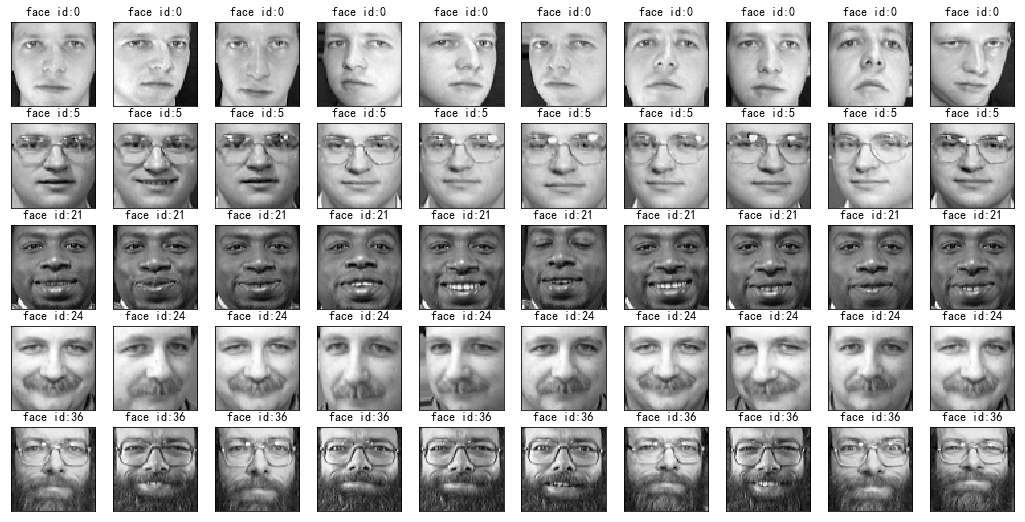

In [6]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5,21,24,36])

In [7]:
data.shape

(400, 64, 64)

In [8]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [9]:
pca=PCA(n_components=90)
pca.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5,1,'Average Face')

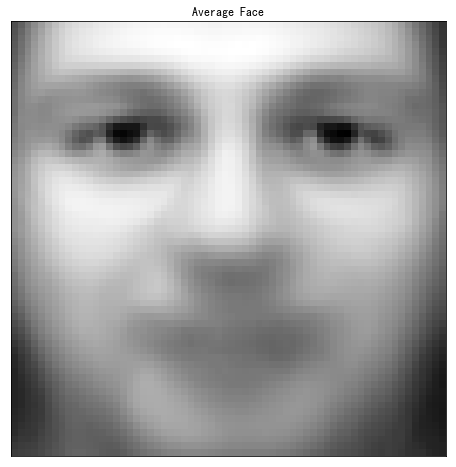

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [11]:
print(data.shape[1])

64


Text(0.5,0.98,'All Eigen Faces')

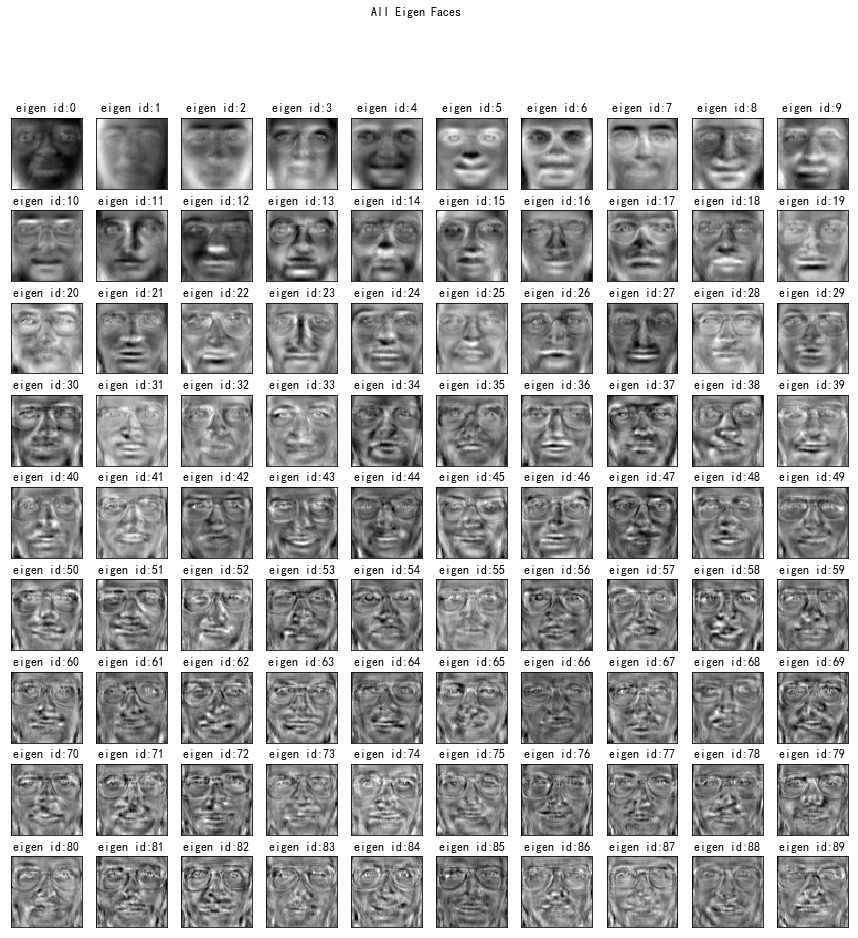

In [13]:
number_of_eigenfaces=pca.n_components
#-------------请在以下区域补充算法--------------     
eigen_faces=pca.components_.reshape((90, 64 , 64 ))
#-------------请在以上区域补充算法--------------

#print(eigen_faces)
cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))